In [1]:
import pandas as pd
import numpy as np
import nltk
#nltk.download('punkt')

In [2]:
#Read data
movies_location = './dataset/movies.csv'

movies = pd.read_csv(movies_location)

In [3]:
movies.head(10)

,rank,title,genre,wiki_plot,imdb_plot
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1..."
5,5,One Flew Over the Cuckoo's Nest,[u' Drama'],"In 1963 Oregon, Randle Patrick ""Mac"" McMurphy ...","In 1963 Oregon, Randle Patrick McMurphy (Nicho..."
6,6,Gone with the Wind,"[u' Drama', u' Romance', u' War']",\nPart 1\n \n Part 1 Part 1 \n \n On the...,"The film opens in Tara, a cotton plantation ow..."
7,7,Citizen Kane,"[u' Drama', u' Mystery']",\n\n\n\nOrson Welles as Charles Foster Kane\n\...,"It's 1941, and newspaper tycoon Charles Foster..."
8,8,The Wizard of Oz,"[u' Adventure', u' Family', u' Fantasy', u' Mu...",The film starts in sepia-tinted Kansas in the ...,Dorothy Gale (Judy Garland) is an orphaned tee...
9,9,Titanic,"[u' Drama', u' Romance']","In 1996, treasure hunter Brock Lovett and his ...","In 1996, treasure hunter Brock Lovett and his ..."


In [4]:
#Joining IMDB Plot and Wiki Plot
movies['plot'] = movies['wiki_plot'].astype(str) +  "\n" + movies['imdb_plot'].astype(str)

In [ ]:
#defining tokenize and snowball stemming method
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
import re

#English language SnowballStemmer object
stemmer = SnowballStemmer("english")

def token_and_stem(para):
    tokens = [words for sent in nltk.sent_tokenize(para) for words in nltk.word_tokenize(sent)]
    
    #filtering to just words using list comprehensions
    filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]', token)]
    
    #stemming filtered tokens
    stemmed = [stemmer.stem(tok) for tok in filtered_tokens]
    
    return stemmed



In [ ]:
#Creating TFIDFVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector = TfidfVectorizer(stop_words='english',
                                tokenizer=token_and_stem)

plot_matrix = tfidf_vector.fit_transform([plot for plot in movies['plot']])



C:\Anaconda\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [ ]:
#clustering with KMeans
from sklearn.cluster import KMeans

# Create a KMeans object with 5 clusters and save as km
k_means = KMeans(n_clusters=5)

# Fit the k-means object with tfidf_matrix
k_means.fit(plot_matrix)

clusters = k_means.labels_.tolist()

# Create a column cluster to denote the generated cluster for each movie
movies["cluster"] = clusters



In [ ]:
#calculating similarity distance
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the similarity distance
sim_dis = 1 - cosine_similarity(plot_matrix)

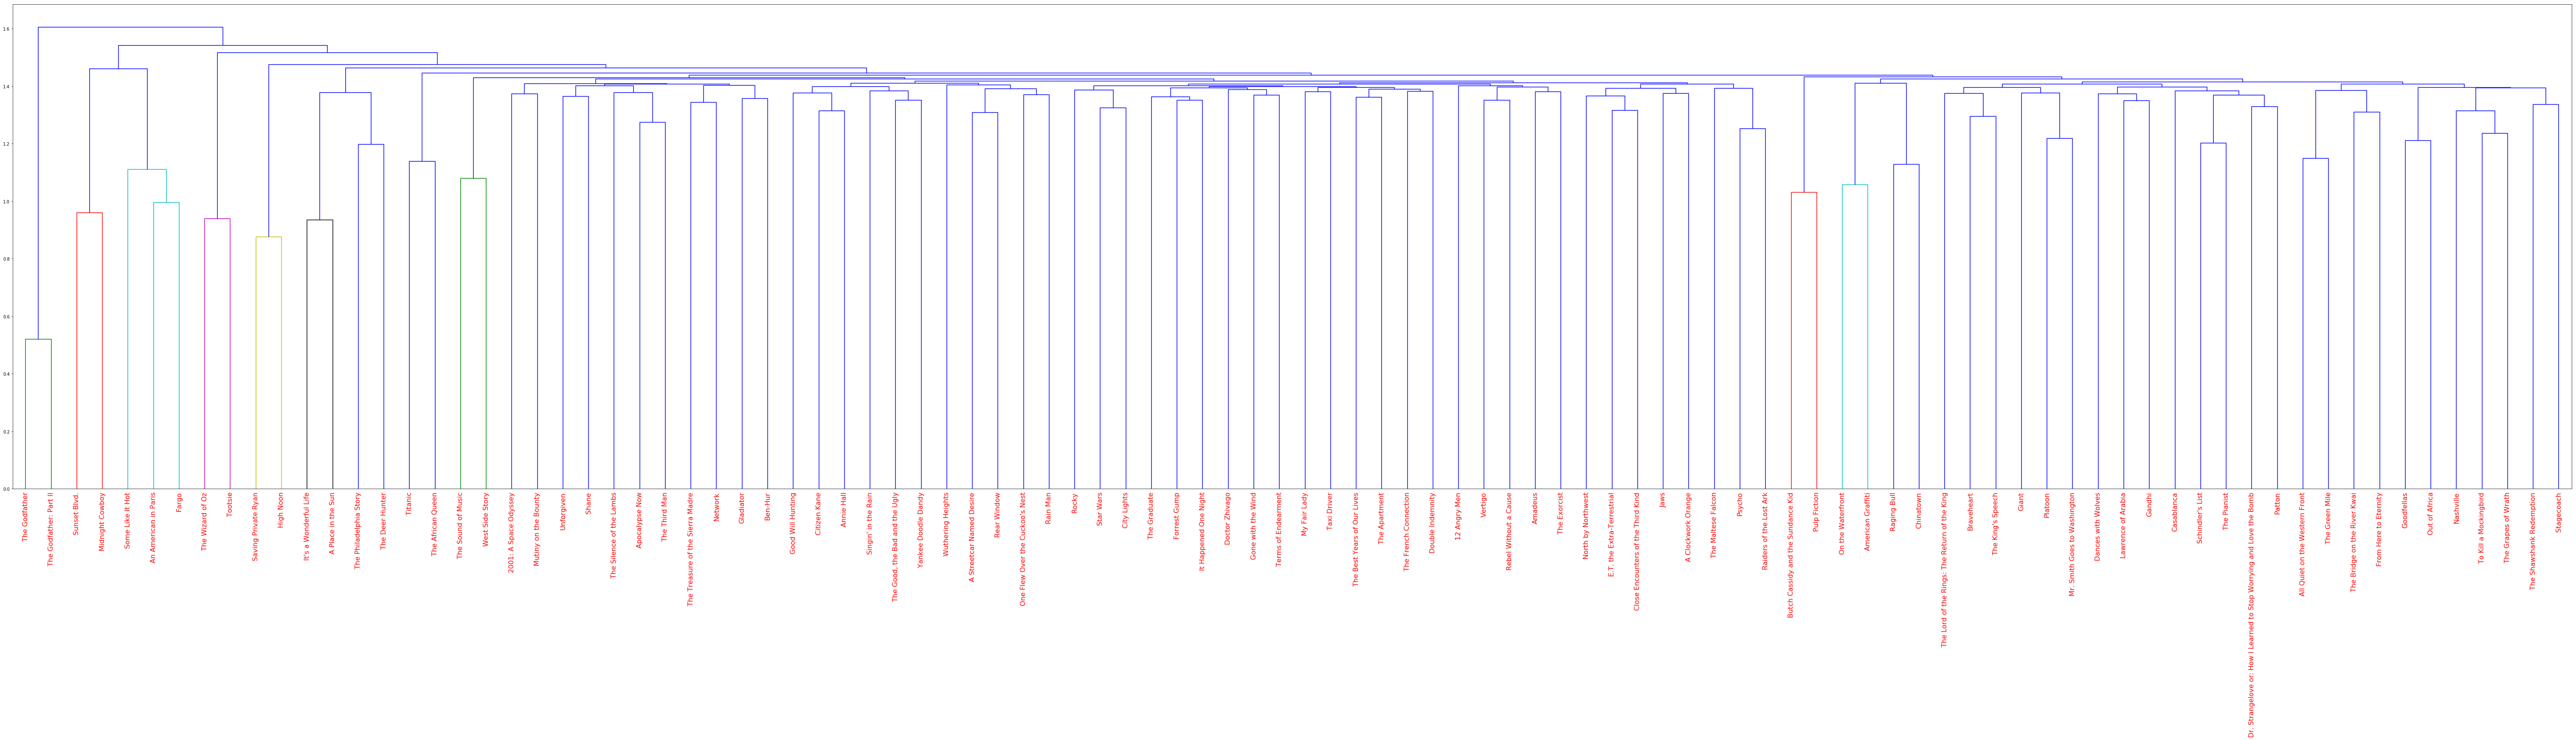

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.cluster.hierarchy import linkage, dendrogram

movies_sim_dis_matrix = linkage(sim_dis, method='complete')

movie_dendrogram = dendrogram(movies_sim_dis_matrix,
               labels=[x for x in movies["title"]],
               leaf_rotation=90,
               leaf_font_size=16,
)

fig = plt.gcf()
_ = [lbl.set_color('r') for lbl in plt.gca().get_xmajorticklabels()]
fig.set_size_inches(108, 21)

# Show the plotted dendrogram
plt.show()

In [ ]:
#makind a dictionary that held the most similar movies based on the ordering of the movies_sim_dis_matrix
similar_movies = {}

for movie in movies_sim_dis_matrix:
    movie_0 = int(movie[0])
    movie_1 = int(movie[1])
    similar_movies[movie_0] = movie_1
    
    


In [ ]:
#Generally we find that movies that are count as a similar value for an earlier value
#do not get their own individual entry to avoid repetition
#As a result we will take all the rated movies and their corresponding most similar movie into 2 separate lists that will be
#searched to create a method to show the most similar movie

rated_movies = []
similar_for_rated = []

for a in similar_movies:
    rated_movies.append(a)
    similar_for_rated.append(similar_movies[a])



In [ ]:
#predict method
def show_most_similar_movie():
    movie_title = input('Please Enter a movie title ').strip()    
    movies['title_lower'] = movies['title'].apply(lambda x: x.lower())
    
    
    
    if any(movies['title_lower'] == movie_title.lower()):
        movie_df = movies[movies['title_lower'] == movie_title]
    else:
        return "Movie does not exist. Please check your spelling and Capitalisations"
    
    
    rank = int(movie_df['rank'])
    
    if rank in rated_movies:
    
        sim_movie_df = movies[movies['rank'] == similar_movies[rank]]
    
        sim_movie = sim_movie_df.title.values
        
    elif rank in similar_for_rated:
        idx = similar_for_rated.index(rank)
        
        sim_movie_df = movies[movies['rank'] == rated_movies[idx]]
        
        sim_movie = sim_movie_df.title.values
        
        
        
    if sim_movie.size > 0:
        sel = sim_movie[0]
    else:
        sel = 'Sorry No Movie Available'
    
    return 'Most Similar movie to {} is: {}'.format(movie_title, sel)
        

In [ ]:
show_most_similar_movie()